In [45]:
# Import Necessary Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import sklearn 
from sklearn.model_selection import train_test_split

In [10]:
# Load the data
df = pd.read_csv('Mall_Customers.csv')

# Display top 5 rows of dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Exploratory Data Analysis and Data Cleaning

In [11]:
# Shape of data(No.of rows and cols)
df.shape

(200, 5)

In [12]:
# Information and Data Types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Data Distribution Summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check Missing Values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Check Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [ ]:
Outliers Identification and Removal
Outlier: An outlier is a data point that is significantly different from other observations in a dataset. It is located far off from the majority of the data and can be present in either the features (independent variables) or the target variable (dependent variable).

Preventing skewed metrics, misleading patterns, and poor model performance requires outlier handling, particularly in regression models where they can disproportionately affect coefficients. Model robustness, generalization, and data integrity can be improved by properly handling errors or rare anomalies.

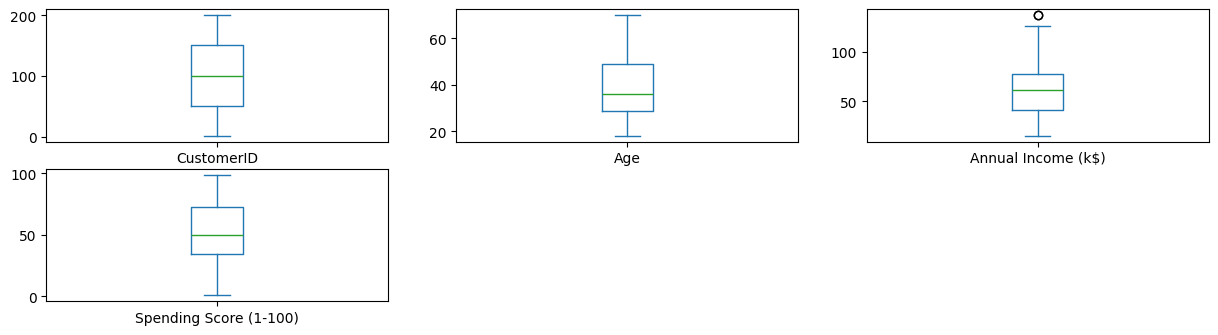

In [12]:
# Box Plot to visualize Outliers
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(15,10))
plt.show()

In [ ]:
CustomerID, Age and Spending Score columns have no outlier, while Annual Income column has few outliers. 
I would not remove the outliers from the target column, as the information can be important.

In [ ]:
InterQuartile Range: The IQR measures the spread of the middle 50% of the data, calculated as:

IQR=Q3−Q1

Where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile). It is used to detect and handle outliers by defining bounds:

Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR

In [ ]:
Clipping: Clipping adjusts extreme values (outliers) to fall within defined bounds:

Values below the lower bound are set to the lower bound. Values above the upper bound are set to the upper bound.

In [25]:
# Define numeric_cols (replace with actual numeric column names from your data)
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  

# Now you can iterate through numeric columns
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate IQR bounds
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR

    # Cap outliers to the IQR bounds
    df[column] = np.clip(df[column], min_value, max_value)

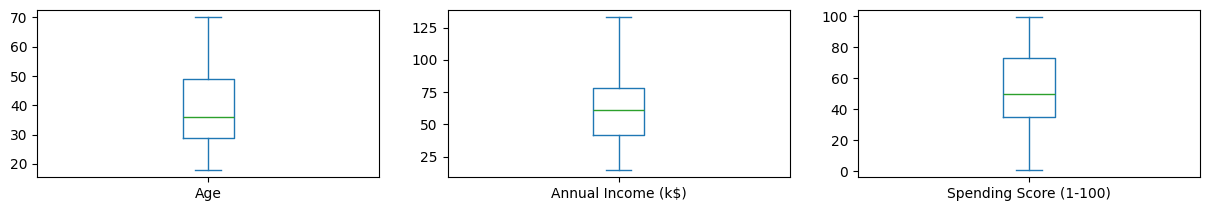

In [26]:
# Confirm outliers have been handled or not
df[numeric_cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10))
plt.show()

In [ ]:
Outliers have been handled.

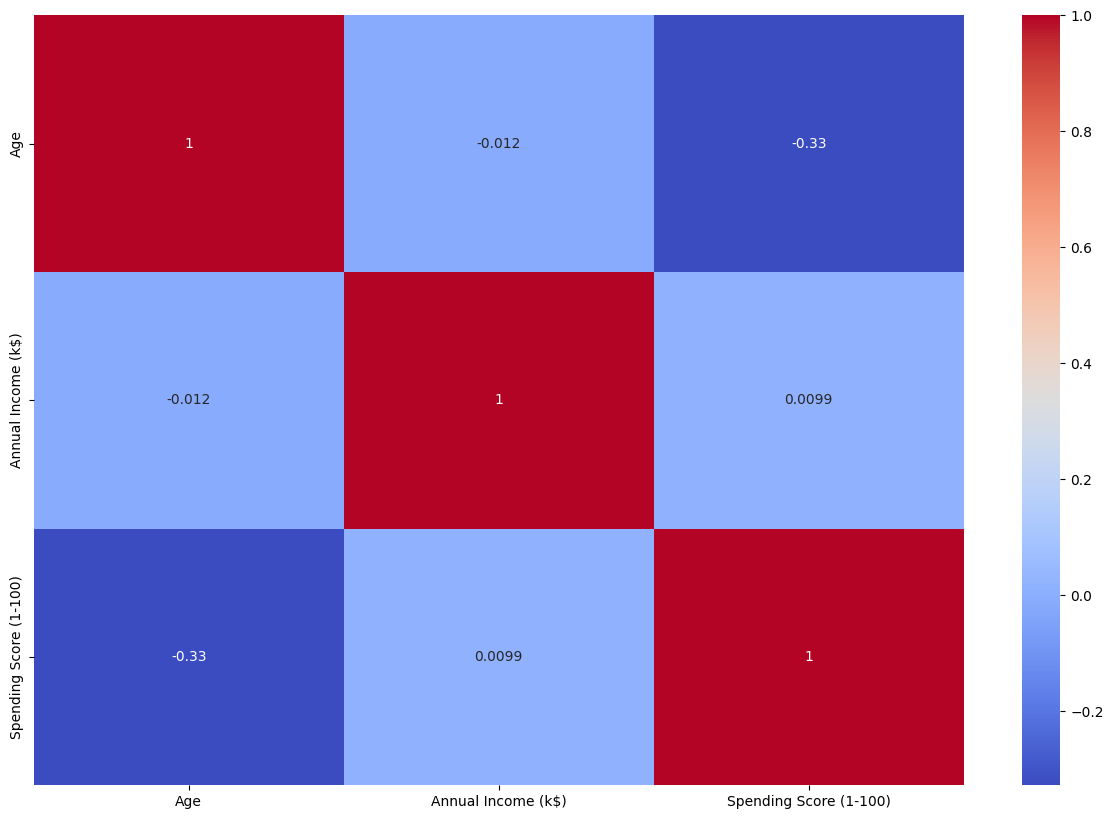

In [27]:
# Correlation Heatmap
# Select only numeric columns for correlation calculation
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm') # Selecting only numeric_cols for correlation
plt.show()

In [ ]:
Correlation: 
Correlation measures the relationship between variables. 
A high correlation coefficient (close to +1) indicates that as one variable increases, the other also increases. 
A high negative correlation (close to -1) means that as one variable increases, the other decreases.
A correlation coefficient close to 0 suggests no linear relationship between the variables.

In [26]:
# Calculate correlations with the target column, only including numeric features
correlations = df[numeric_cols].corr()['Spending Score (1-100)'].drop('Spending Score (1-100)') # Drop target column to avoid self correlation calculation
print(correlations)

Age                  -0.327227
Annual Income (k$)    0.009930
Name: Spending Score (1-100), dtype: float64


In [ ]:
From the above calculated correlations, it can be seen that AGE, and Annual Income are weakly correlated

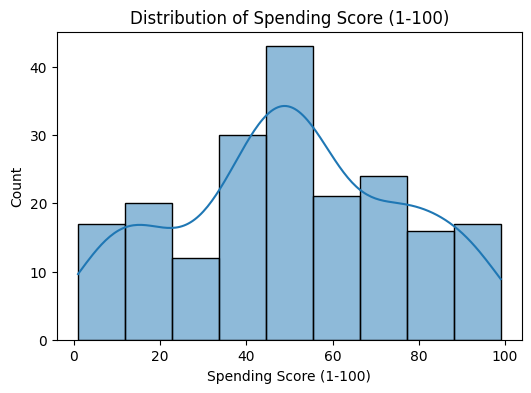

In [28]:
# Histogram of Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.show()

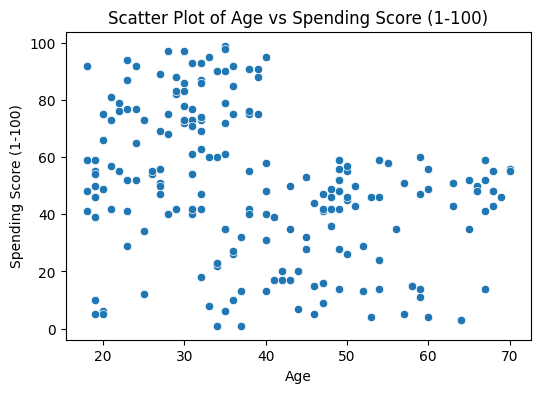

In [29]:
# Scatter Plot of Target Variable and Age
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.title('Scatter Plot of Age vs Spending Score (1-100)')
plt.show()

In [ ]:
Feature Selection
Feature selection is the process of selecting the most relevant variables for model training, which enhances model accuracy and decreases overfitting by eliminating irrelevant or redundant features.

We can select relevant features using correlation scores.

In [30]:
# Feature Selection
columns_to_drop = ['Annual Income (k$)']
df = df.drop(columns=columns_to_drop)

In [ ]:
Model Building

In [31]:
# Input and Target
X = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']

In [40]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [ ]:
Standardization: 
Standardization rescales data to have a mean of 0 and a standard deviation of 1, making it suitable for models sensitive to feature scaling.

In [57]:
# 필요한 열만 선택
selected_features = ["Age", "Spending Score (1-100)"]
data = df[selected_features]

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [58]:
# K-Means: 최적 k 찾기
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

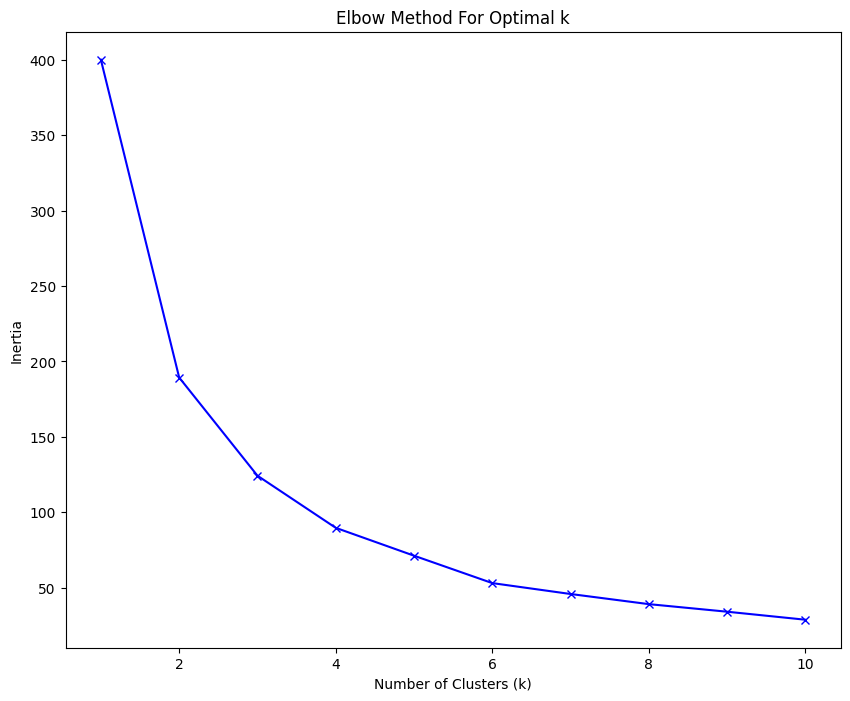

In [59]:
# 엘보우 그래프
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

In [71]:
# K-Means 군집화 (k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data["Cluster_KMeans"] = kmeans.fit_predict(data_scaled).copy()

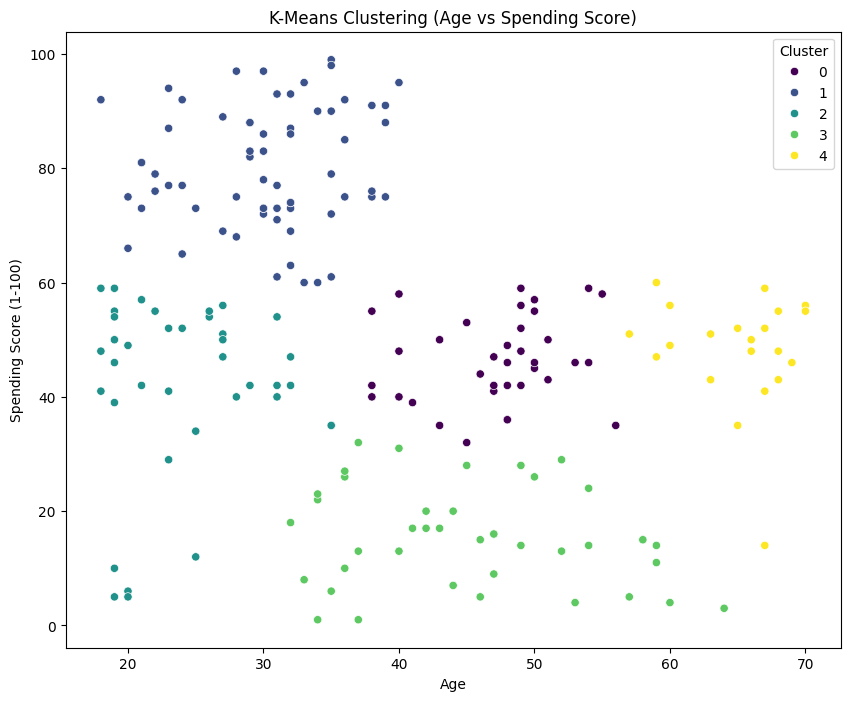

In [72]:
# K-Means 군집화 시각화 (Age vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data["Age"],
    y=data["Spending Score (1-100)"],
    hue=data["Cluster_KMeans"],
    palette="viridis",
)
plt.title("K-Means Clustering (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


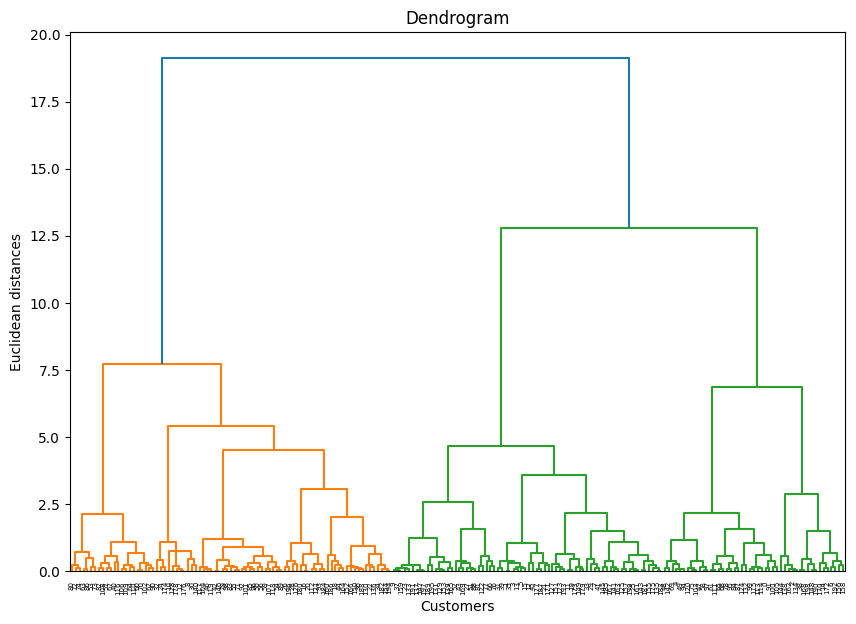

In [65]:
# 계층적 군집화: 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [66]:
# 계층적 군집화 (k=5)
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward") # use 'metric' instead of 'affinity'
data["Cluster_HC"] = hc.fit_predict(data_scaled)


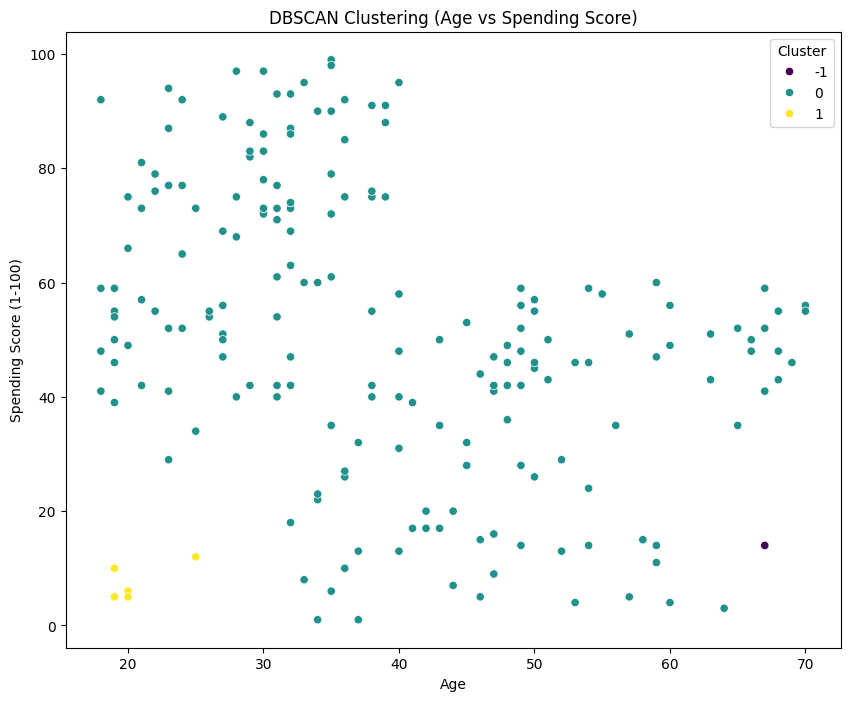

In [69]:
# DBSCAN 군집화 (기본 설정)
dbscan = DBSCAN(eps=0.5, min_samples=5)
data["Cluster_DBSCAN"] = dbscan.fit_predict(data_scaled)

# DBSCAN 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data["Age"],
    y=data["Spending Score (1-100)"],
    hue=data["Cluster_DBSCAN"],
    palette="viridis",
)
plt.title("DBSCAN Clustering (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [70]:
# Silhouette Score for K-Means
silhouette_avg_kmeans = silhouette_score(data_scaled, data["Cluster_KMeans"])
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans:.2f}")

Silhouette Score for K-Means: 0.45


In [ ]:
The silhouette score is a powerful metric widely used in the field of clustering to evaluate the quality of clusters formed by various algorithms. 
0.25 to 0.50: 
Implies poor clustering. Many items may be classified incorrectly or clusters may be overlapping excessively.